Visualisation
==============

The glucifer module provides a dynamic visualisation tool for Underworld data, similar in style to matplotlib.

**This notebook demonstrates:**

1. setting up figure objects
2. drawing meshes, surfaces, points and vector arrows
3. saving figures to file
4. publication ready figures
5. interactive viewer

**Keywords:** visualisation, glucifer, 3D plots, interactive plots

**Note** All classes and functions have corresponding docstrings which are available via the python `help()` function.

Import underworld and the glucifer modules.

In [1]:
import underworld as uw
import glucifer

The Figure
----------

The Figure class is a container object essential for glucifer visualisations.

In [2]:
newfigure = glucifer.Figure()

Figures remain active while they are in scope, or while some object retains a reference to them. 

Drawing Objects
---------------

Drawing objects are the items that are rendered within a `Figure`. 
Currently supported drawing objects:
 * `Mesh()`, renders a element mesh's geometry
 * `Suface()`, renders the scalar field over the mesh.
 * `Points()`, renders a Swarm 
 * `VectorArrows()`, renders vector arrows across a vector field (such as a VelocityField). 

See `help(Drawing)` for options applicable to all drawing objects. 

**Mesh**

Render mesh geometry and node indices. Note, the `append()` method is used to attach this drawing object to a figure object lists of drawing objects. 


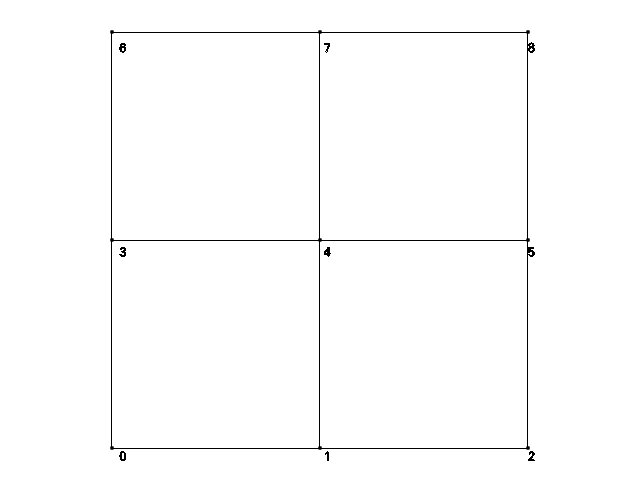

In [3]:
# create mesh and display it
mesh  = uw.mesh.FeMesh_Cartesian( 'Q1', (2,2), (0.,0.), (1.,1.) )
fig = glucifer.Figure ( edgecolour="black" )
fig.append( glucifer.objects.Mesh( mesh, nodeNumbers=True ) )
fig.show()

**Surface**

This object will draw the desired faces of a scalar field. Check `help(Surface)` for the full options of the Surface drawing object.


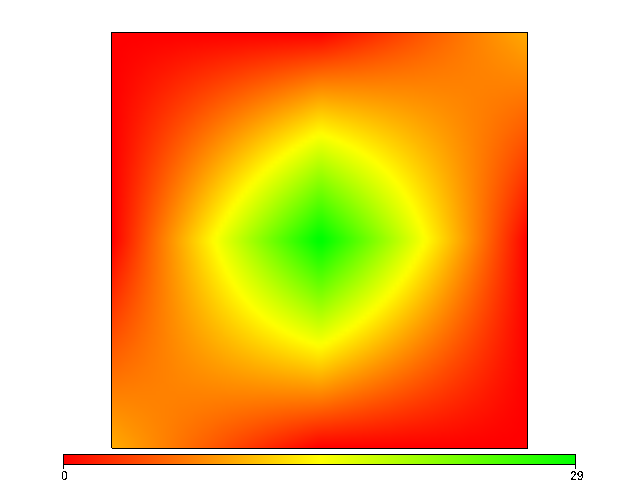

In [4]:
# create an object with a single value at each mesh point
fevar = uw.mesh.MeshVariable( mesh, 1 )
# give the variable some values
fevar.data[:] = 0.
fevar.data[0] = 10.
fevar.data[4] = 30.
fevar.data[8] = 10.

fig = glucifer.Figure ( edgecolour="black" )
fig.append( glucifer.objects.Surface( mesh, fevar, colours="red yellow green" ) )

fig.show()

**VectorArrows**

This object will draw an array of vector arrows across the image using the provided vector field to determine their direction. Check `help(VectorArrows)` for the full options of the VectorArrows drawing object.

In [5]:
# create a new meshvariable (note that it has 2 values at each mesh point)
fevarVec = uw.mesh.MeshVariable( mesh, 2 )
# initialise the vector field to something
fevarVec.data[:] = [ 0., 0.]
fevarVec.data[0] = [ 1., 1.]
fevarVec.data[1] = [ 0., 1.]
fevarVec.data[2] = [-1., 1.]
fevarVec.data[3] = [ 1., 0.]
fevarVec.data[5] = [-1., 0.]
fevarVec.data[6] = [ 1.,-1.]
fevarVec.data[7] = [ 0.,-1.]
fevarVec.data[8] = [-1.,-1.]

Create and show vector arrow figure.


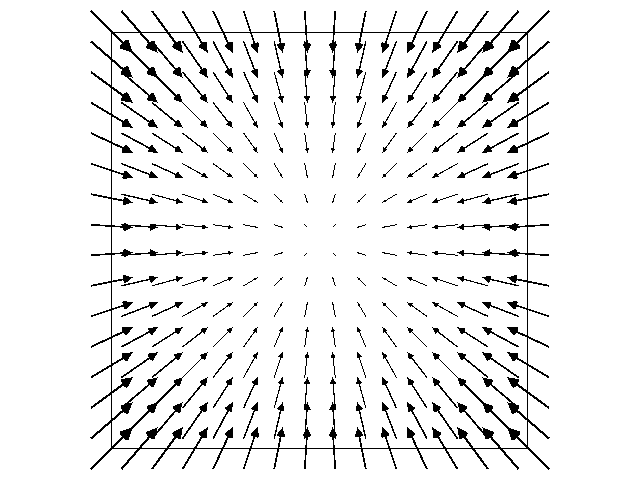

In [6]:
fig = glucifer.Figure( edgecolour="black" )
fig.append( glucifer.objects.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2 ) )
fig.show()

**Points**

This object will draw a swarm of points using the provided Underworld swarm for the point locations and an Underworld swarm variable for the point colours (or size or opacity). Check `help(Points)` for the full options of the Points drawing object.

Firstly, create a swarm over the whole mesh with 200 particles per cell.

In [7]:
swarm  = uw.swarm.Swarm( mesh=mesh )
layout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=200 )
swarm.populate_using_layout( layout )

Plot the swarm particle distribution.


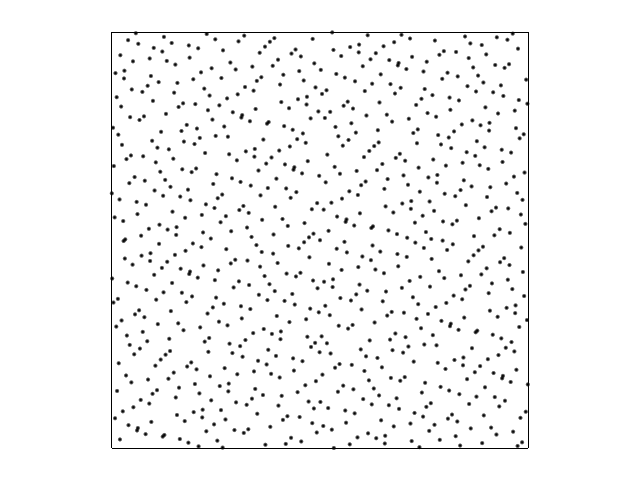

In [8]:
fig = glucifer.Figure( edgecolour="blue" )
fig.append( glucifer.objects.Points( swarm=swarm, pointSize=5, colourBar = False ) )
fig.show()

Now add a swarm variable to define the colour.

In [9]:
swarmVar = swarm.add_variable("double",1)
swarmVar.data[:]       = 0.
swarmVar.data[200:400] = 1.
swarmVar.data[400:600] = 2.
swarmVar.data[600:800] = 3.

In [10]:
someFn = uw.function.coord()[0]

Since there are 4 cells and 200 per cell we can divide the swarm up into 4 equal sections and give each a different colour. These will be randomly distributed around the figure. The ``fn_colour`` argument in the ``points`` object asigns colours to each swarm particle depending on the variable ``swarmVar``.  
`fn_colour` accepts `Function` objects too and is a powerful tool to quickly visualise a model setup. Set useVar to `False` to see the particle's coloured by there x coordinate


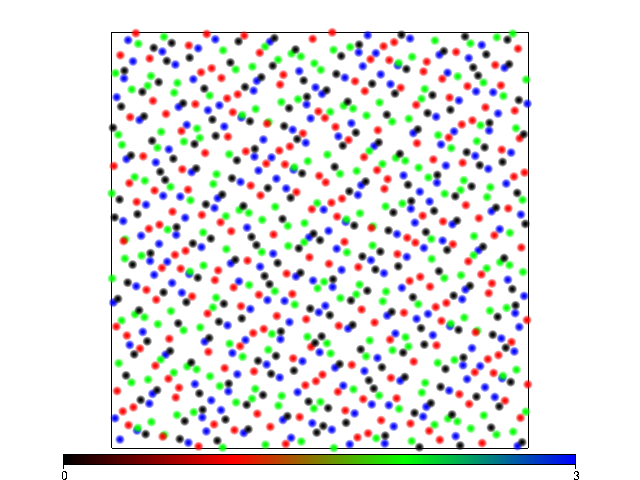

In [11]:
useVar = True
fig = glucifer.Figure( edgecolour="black" )

if useVar:
    fig.append( glucifer.objects.Points(swarm=swarm, fn_colour=swarmVar, pointSize=10, colours='black red green blue') )
else:
    someFn = uw.function.coord()[0]
    fig.append( glucifer.objects.Points(swarm=swarm, fn_colour=someFn, pointSize=10, colours='black red green blue') )
fig.show()

Image Layering
--------------
Multiple drawing objects can, of course, be layered upon each other to build up complex images. This is achieved by making multiple calls `append()`


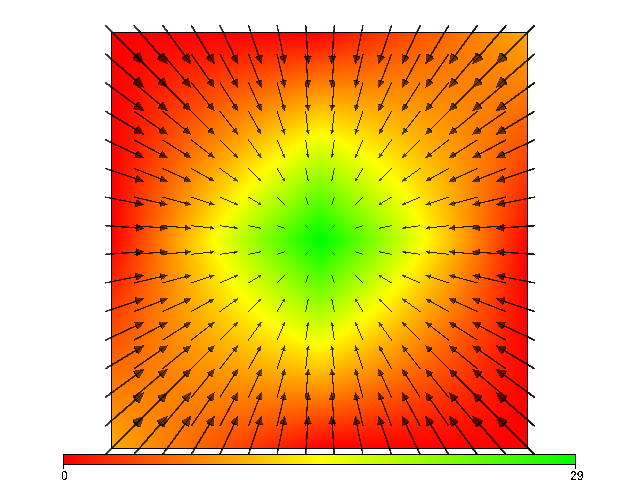

In [12]:
fig = glucifer.Figure( edgecolour="black" )
fig.append( glucifer.objects.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2, opacity=0.6 ) )
fig.append( glucifer.objects.Surface( mesh, fevar, colours="red yellow green" ) )
fig.show()

The `clear()` figure method can be used to clear all drawing objects from an active figure:

In [13]:
fig.clear()

Outputting
==========
To output results to raster files (such as PNG), simply use the `savefig()` method.

In [14]:
fig.append( glucifer.objects.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2, opacity=0.6 ) )
fig.append( glucifer.objects.Surface( mesh, fevar, colours="red yellow green" ) )
figfile = "savedfigure.png"
fig.save_image( figfile )
import glob
import os
print(glob.glob( figfile ))

['savedfigure.png']


Let's clean up the directory by deleting this output figure file.

In [15]:
os.remove( figfile )

Likewise, for those who wish to utilise the native viewer, the database object can be saved using the `saveDB()` method:

In [16]:
fig.save_database("dbFile.gldb")
print(glob.glob("dbFile.gldb"))

['dbFile.gldb']


Again, let's clean up the local directory.

In [17]:
os.remove( "dbFile.gldb" )

Publication quality figures
=====

With minor modifications gLucifer figures are easily made publication ready.

In [18]:
propertyList = {"margin" : 50, "rulers" : True, "rulerticks" : 5}
fig = glucifer.Figure(title="Test Plot", properties=propertyList)

**Modifying surface plots**

Setup surface plot with colour gradient contrast bias towards more red (fix red as the colour for the value 25.0 by preceding the colour with this value in brackets) and some transparency (append a colon and the transparency value to the colour).

In [19]:
surf = glucifer.objects.Surface( mesh, fevar, colours="red (25.0)yellow:0.8 green:0.5")

Alter the properties of the colour bar associated with the surface plot. Here we set the number of tick marks to 3 and the values of the first and third ticks, modify the margin and width and set the alignment to right (available values: left/right [vertical], bottom/top [horizontal]).

In [20]:
surf.colourBar.properties = {"ticks" : 3, "margin" : 40, "width" : 20, "tick1" : 10, "tick3" : 25, "align" : "right"}

**Adding a floating labels**

Add test labels in the plot. Note that changing the font size (``scaling``) can only be done using the ``vector`` font, which is currently the only supported font for label plotting. 

In addition only a single font size scaling can be used for all labels on an object, changing the font scaling of the default object will apply to all labels already added - so we add the second label to the surface object to plot it at a different size.

In [21]:
#Plot a label to the default figure object (fig.draw)
fig.draw.label("Label1 @ Centre", (0.2,0.7,0), scaling=0.1)
#Plot a lable to a previously added object
surf.label("Label2 @ Centre", (0.2,0.3,0), scaling=0.15)

Construct and plot final figure to screen. This can also be saved to PNG/JPEG or a WebGL visualisation depending on what is required.


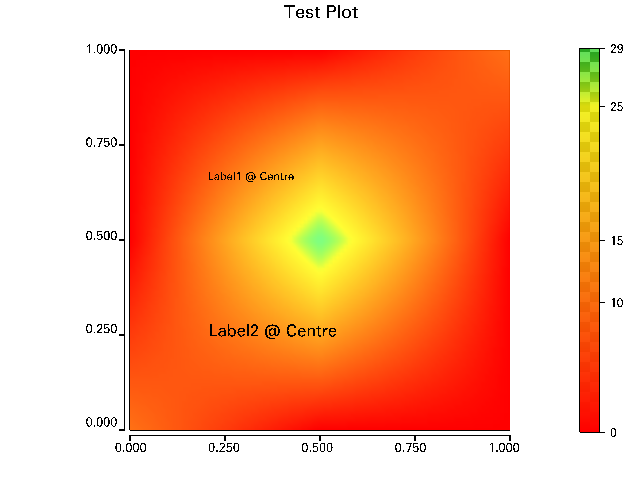

In [22]:
fig.append(surf)
fig.show()

Interactivity & Scripting
==========
An interactive viewer can be opened from inside the notebook using the open_viewer() method:

In [23]:
fig = glucifer.Figure( edgecolour="black" )
fig.append( glucifer.objects.Surface( mesh, fevar, colours="red yellow green", colourBar = False ) )
fig.append( glucifer.objects.VectorArrows( mesh, fevarVec, scaling=0.1, arrowHead=0.2, opacity=0.6 ) )
fig.open_viewer()

Once this interactive viewer is open we can either shift the view using the mouse, or we can send commands to shift the view from inside the notebook. For example:

In [24]:
fig.send_command('rotate y 45')

In the interactive mode we can export the current settings of the viewer (to a text file) and load them from file again.

Finally, the viewer is closed using:

In [25]:
fig.close_viewer()

Scripts are used to enable similar commands to be executed on figures embedded in the notebooks. These are set up in the same way as commands.


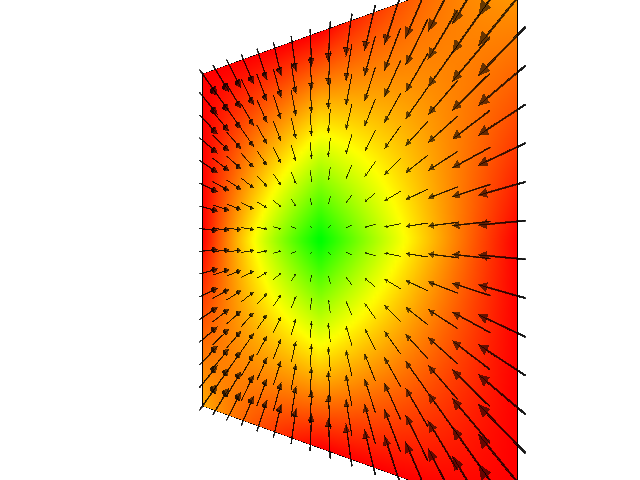

In [26]:
sc = fig.script('rotate y -45')
fig.show()